In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import gaussian_kde
import sys
import os
import yaml
import pandas as pd

In [13]:
with open('a-project_repar.yml', 'r', encoding='utf-8') as f:
    proj = yaml.load(f.read(), Loader=yaml.FullLoader)
name_project = proj['name']
#name_project = 'project_repartrition/output_repar_03-01/'               # Harmon server
name_project

'project_repartition_v4.0/output_repar_v9.2_01-01/'

In [14]:
with open('0_config.yml', 'r', encoding='utf-8') as f:
    dir_config = yaml.load(f.read(), Loader=yaml.FullLoader)
dir_project_workspace = dir_config['dir_project_workspace']
dir_CC_workspace = dir_config['dir_CC_workspace']
print('dir_CC_workspace: ', dir_CC_workspace)
print('dir_project_workspace: ', dir_project_workspace)
dir_project = os.path.join(dir_project_workspace, name_project)
print('dir_project: ', dir_project)

dir_CC_workspace:  ./
dir_project_workspace:  ./
dir_project:  ./project_repartition_v4.0/output_repar_v9.2_01-01/


In [15]:
filename = dir_project+'Basic_info.yml'
with open(filename, 'r', encoding='utf-8') as f:
    info_basic = yaml.load(f.read(), Loader=yaml.FullLoader)
filename_bi = dir_project+'Basic_info.npy'
info_basic_bi = np.load(filename_bi, allow_pickle='TRUE').item()      # setting dictionary

In [16]:
key_subworks = info_basic['key_subworks']

In [17]:
dir_image = dir_project+info_basic['dir_image']
dir_partition = dir_project+info_basic['dir_partition']

In [18]:
stalistname_all = info_basic['stalistname_all']
stainfo = pd.read_excel(stalistname_all)
nsta_all = len(stainfo.iloc[:,0])
stalist_all = stainfo['Station'].tolist()
lat_stations_all = stainfo['latitude'].tolist() 
lon_stations_all = stainfo['longitude'].tolist()

In [19]:
stations = {}
lat = {}
lon = {}
lon_centroid_all = {}
lat_centroid_all = {}
for key in key_subworks:
    filepath = dir_partition + str(key) + '.txt'
    stations_this, lat_stations_this, lon_stations_this = np.loadtxt(filepath, dtype='str' , unpack=True)
    stations[key] = stations_this
    lat[key] = lat_stations_this.astype(float)
    lon[key] = lon_stations_this.astype(float)
    lon_centroid_all[key] = np.mean(lon[key])
    lat_centroid_all[key] = np.mean(lat[key])
lon_centroid_all = list(lon_centroid_all.values())
lat_centroid_all = list(lat_centroid_all.values())

In [20]:
faults = np.load('clark_faults.npy', allow_pickle='TRUE').item()

In [21]:
def plot_density(ax,x,y,data,cmap='plasma'):
    density = gaussian_kde(data)(data)
    density = density/(max(density)-min(density))
    im=ax.scatter(x=x, y=y, c=density, cmap=cmap)
    plt.colorbar(im)
    return ax

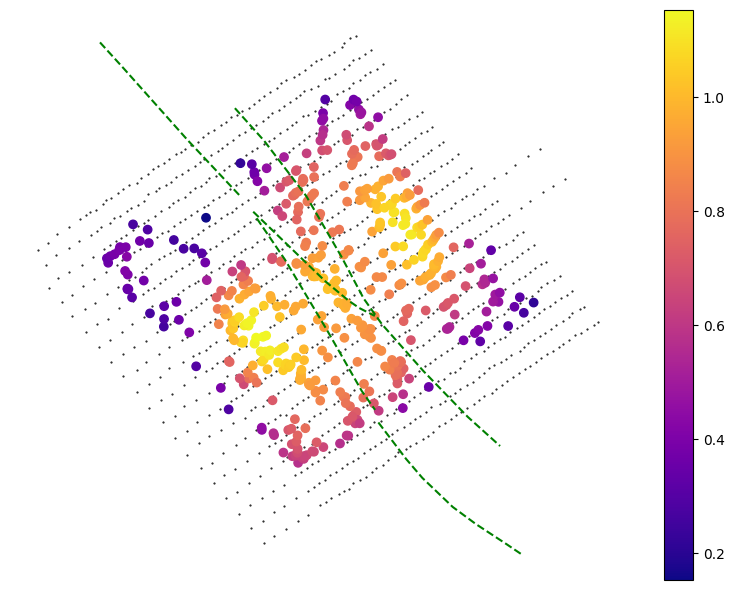

In [22]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(lon_stations_all, lat_stations_all,marker='.',color='k',s=1)
for i in range(len(faults)):
    ax.plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'g--')
ax.scatter(lon_centroid_all,lat_centroid_all,c='r',marker='^',s=5)
ax.axis('off')
data = np.vstack([lon_centroid_all, lat_centroid_all])
ax = plot_density(ax,lon_centroid_all, lat_centroid_all, data, cmap='plasma')
plt.tight_layout()
plt.savefig(dir_image + 'station_distribution.png')